<a href="https://colab.research.google.com/github/Ssahu620/ss-Assignment-17/blob/main/ss_v1_17_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time


In [10]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

ss - data cleanup
Column duration should be dropped as per “database creator’s instructions’.

Column emp.var.rate, cons.price.idx, cons.conf.idx, and nr.employed should be dropped as they are correlated to euribor3m.

Rename column “Y” to “subscribed”.

Rename “default” to “credit_default”.


In [14]:

clean_df = df.drop(columns=['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed'])
clean_df = clean_df.rename(columns={'y': 'subscribed', 'default': 'credit_default'})
clean_df.head()

clean_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   credit_default  41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  euribor3m       41188 non-null  float64
 15  subscribed      41188 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 5.0+ MB


ss - list unique values along with their percentages for all columns in clean_df

In [17]:


for col in clean_df.columns:
    unique_values = clean_df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}")
    value_counts = clean_df[col].value_counts(normalize=True) * 100
    print("Percentage of unique values:")
    print(value_counts)
    print("-" * 30)

Column: age
Unique values: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Percentage of unique values:
age
31    4.727105
32    4.481888
33    4.450325
36    4.321647
35    4.270661
        ...   
91    0.004856
98    0.004856
95    0.002428
87    0.002428
94    0.002428
Name: proportion, Length: 78, dtype: float64
------------------------------
Column: job
Unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Percentage of unique values:
job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemplo

ss - calculate percentage of null values per column in clean_df

In [18]:


null_percentages = clean_df.isnull().sum() / len(clean_df) * 100
print("Percentage of null values per column:")
null_percentages

Percentage of null values per column:


,0
age,0.0
job,0.0
marital,0.0
education,0.0
credit_default,0.0
housing,0.0
loan,0.0
contact,0.0
month,0.0
day_of_week,0.0


ss - since credit_default has 20% unknown it's best to drop it.

In [19]:
clean_df = clean_df.drop(columns=['credit_default'])

In [20]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  int64  
 1   job          41188 non-null  object 
 2   marital      41188 non-null  object 
 3   education    41188 non-null  object 
 4   housing      41188 non-null  object 
 5   loan         41188 non-null  object 
 6   contact      41188 non-null  object 
 7   month        41188 non-null  object 
 8   day_of_week  41188 non-null  object 
 9   campaign     41188 non-null  int64  
 10  pdays        41188 non-null  int64  
 11  previous     41188 non-null  int64  
 12  poutcome     41188 non-null  object 
 13  euribor3m    41188 non-null  float64
 14  subscribed   41188 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 4.7+ MB


ss - remove rows with "unknown" values. Maximum it will impact 4% of rows.

In [22]:


clean_df_2 = clean_df[~(clean_df == 'unknown').any(axis=1)].copy()
clean_df_2.info()
clean_df_2.shape

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          38245 non-null  int64  
 1   job          38245 non-null  object 
 2   marital      38245 non-null  object 
 3   education    38245 non-null  object 
 4   housing      38245 non-null  object 
 5   loan         38245 non-null  object 
 6   contact      38245 non-null  object 
 7   month        38245 non-null  object 
 8   day_of_week  38245 non-null  object 
 9   campaign     38245 non-null  int64  
 10  pdays        38245 non-null  int64  
 11  previous     38245 non-null  int64  
 12  poutcome     38245 non-null  object 
 13  euribor3m    38245 non-null  float64
 14  subscribed   38245 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 4.7+ MB


(38245, 15)

ss - plot histograms for all values in all columns of clean_df_2

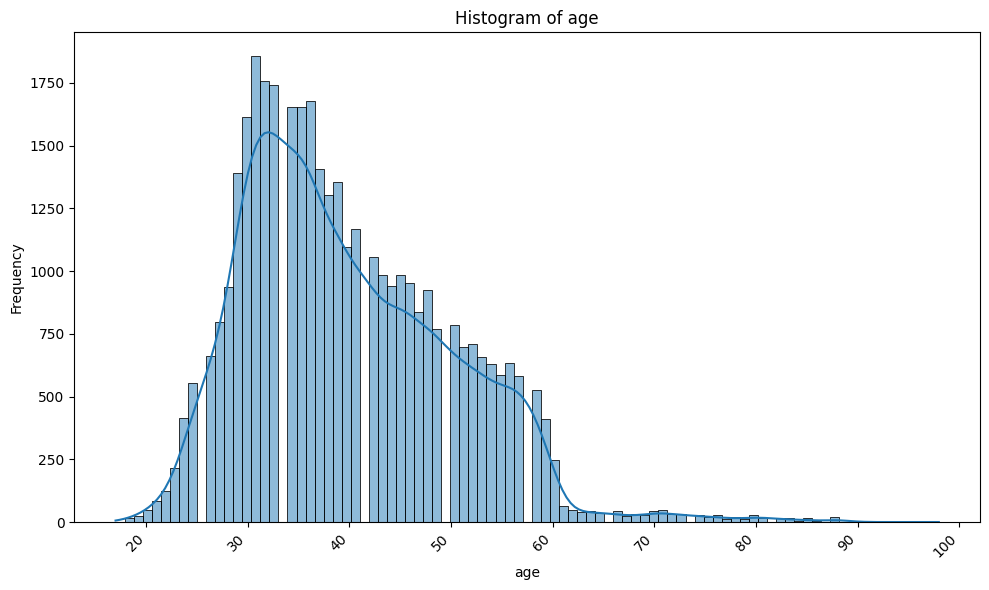

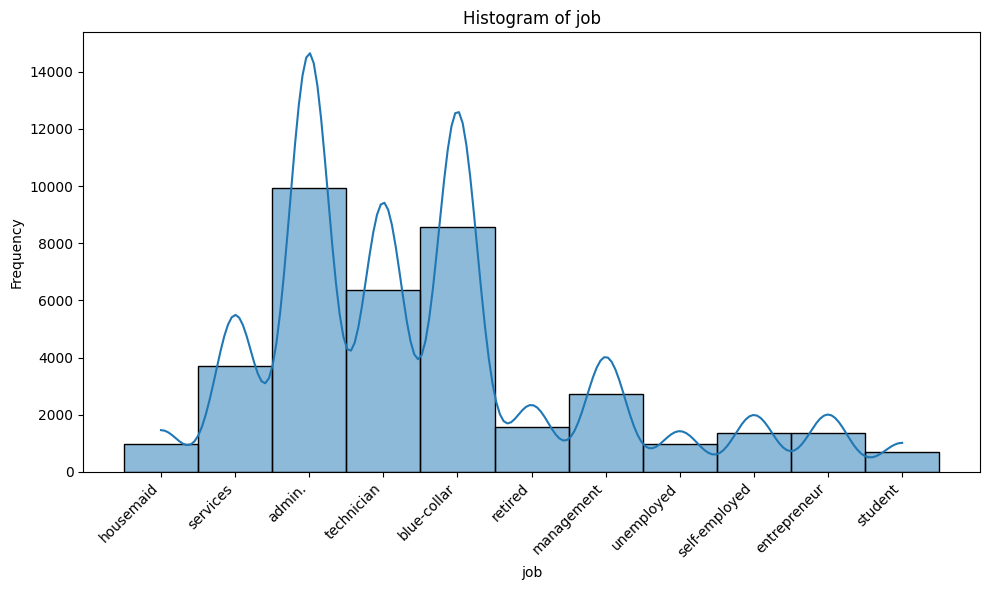

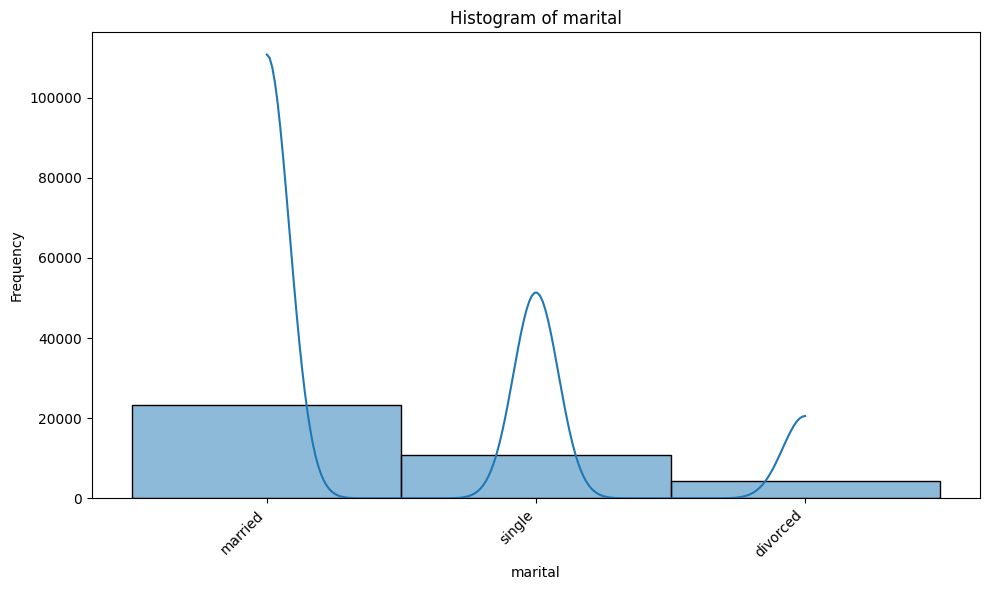

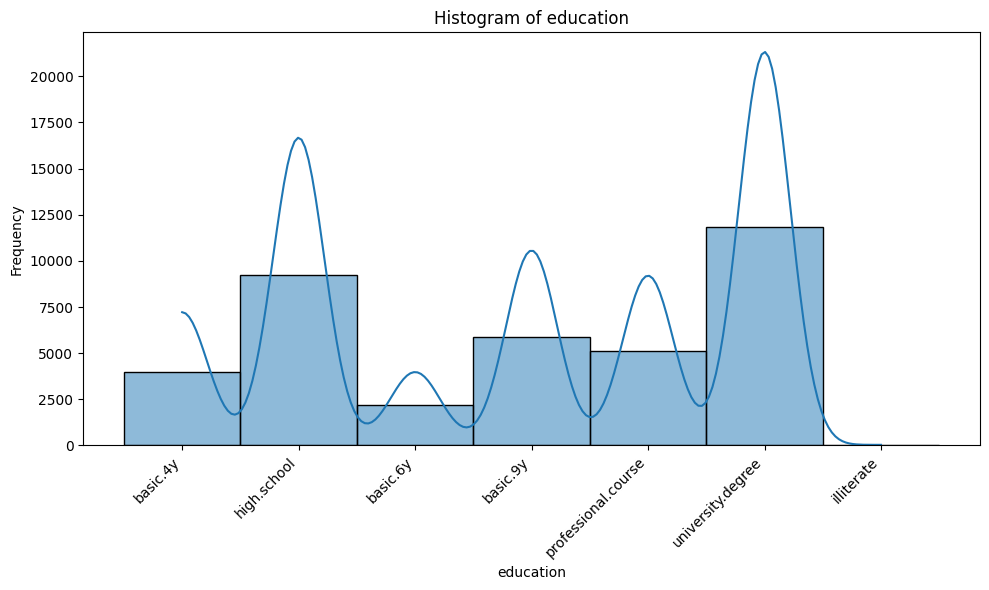

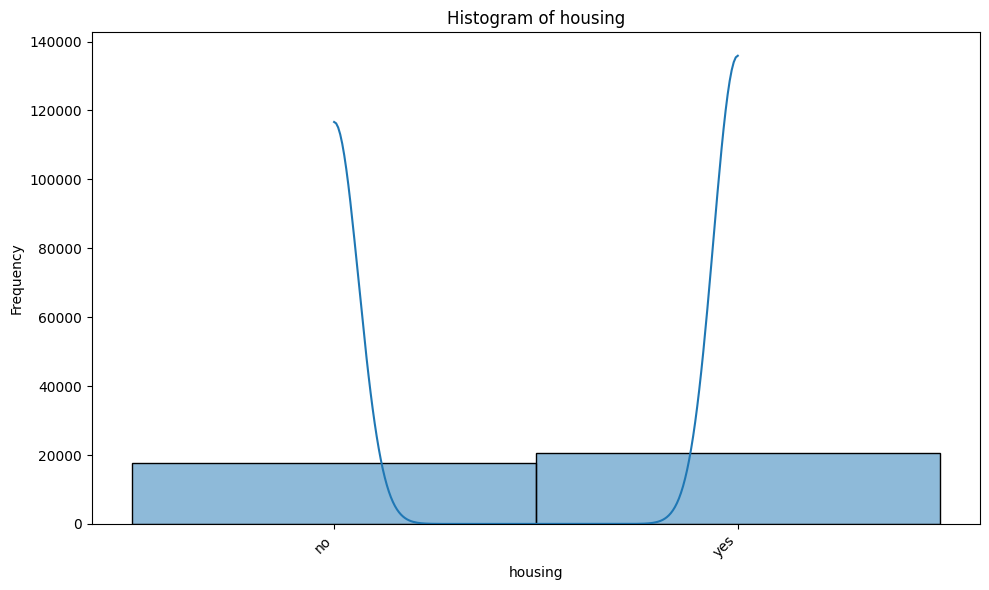

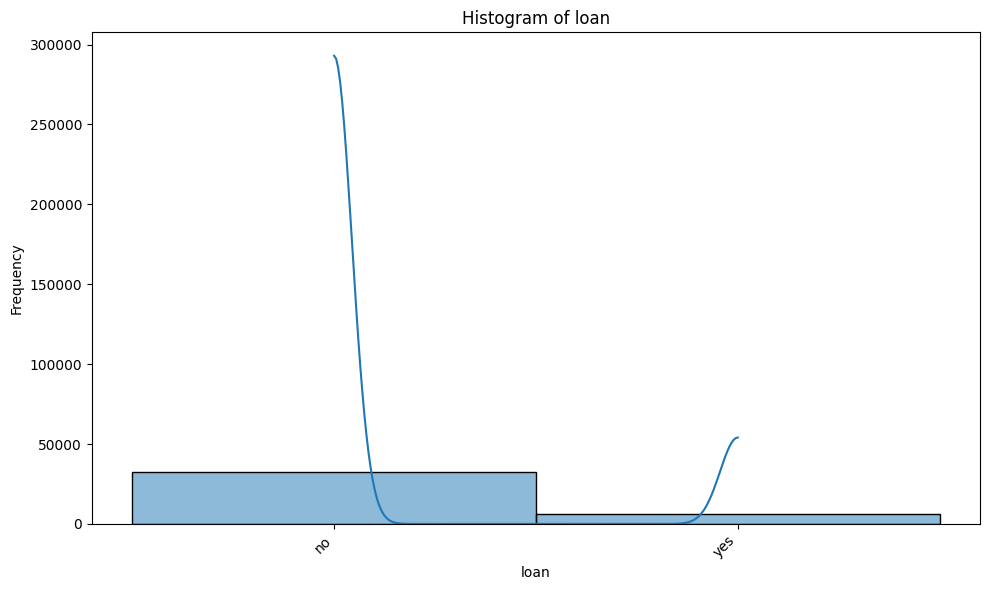

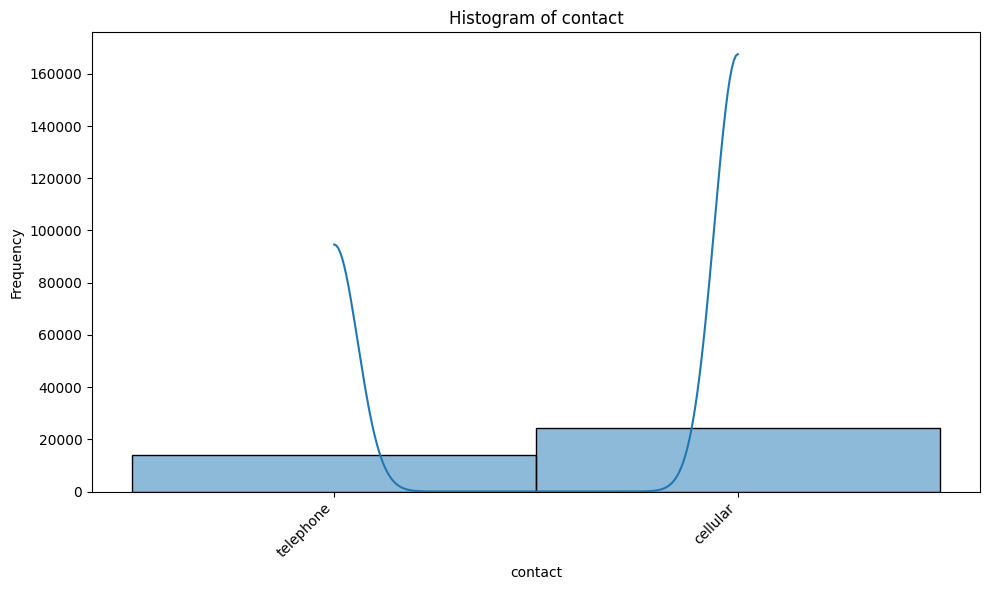

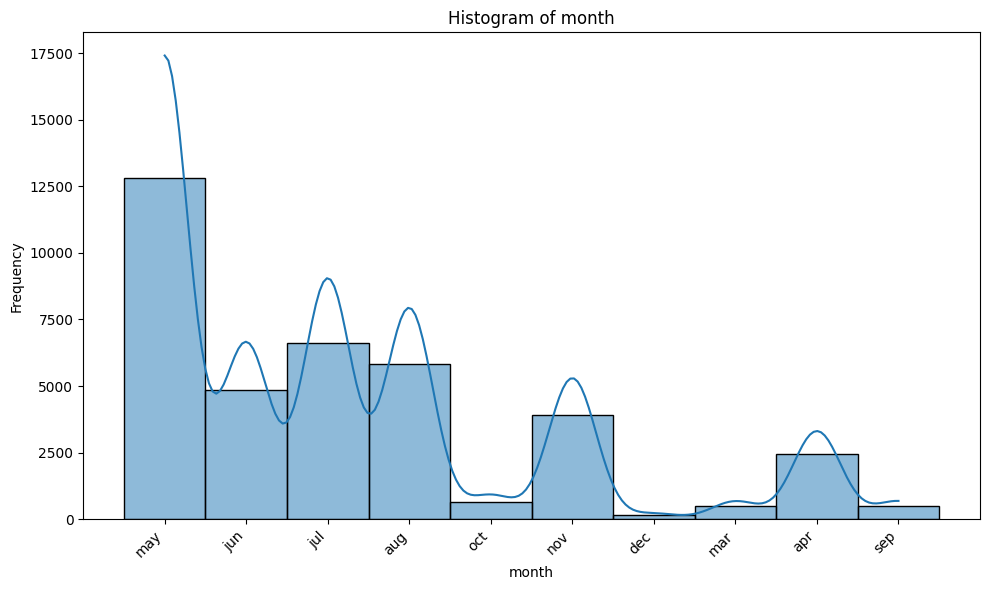

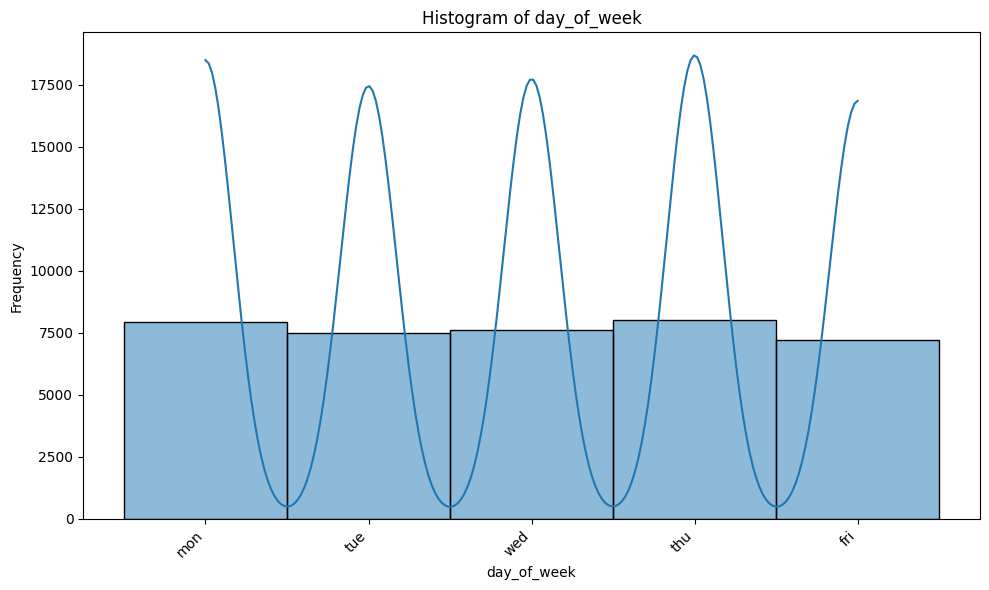

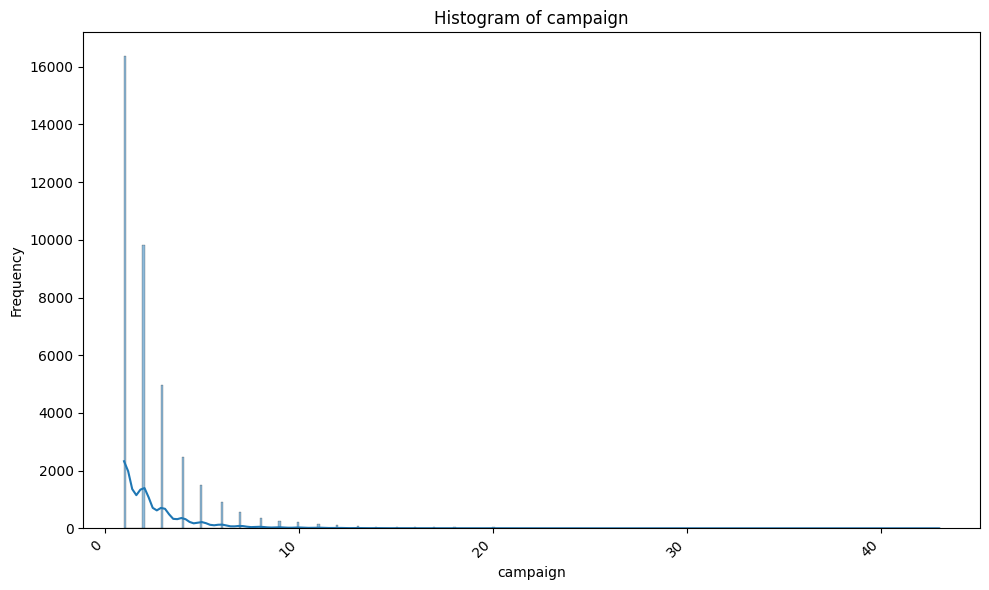

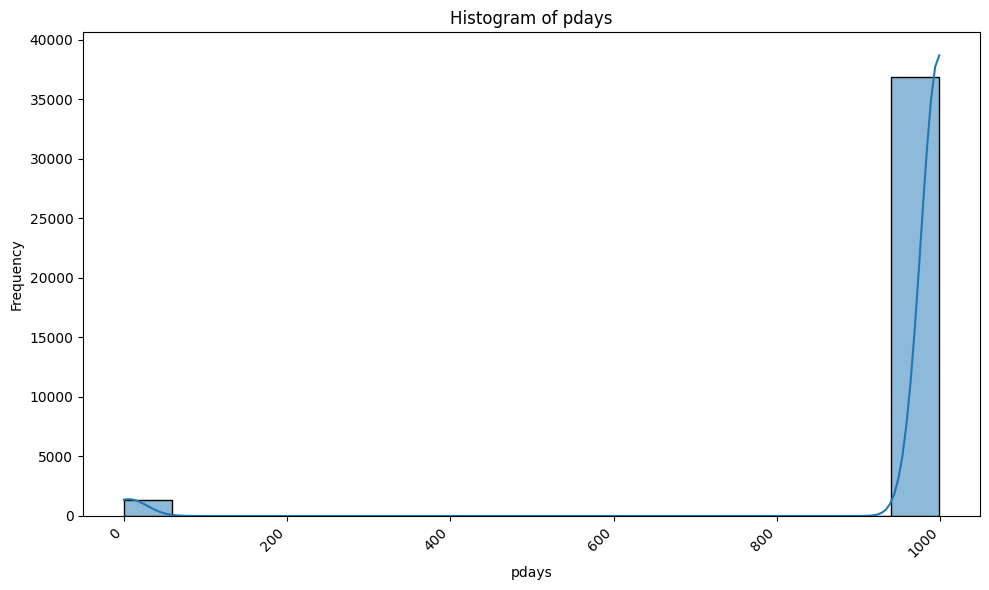

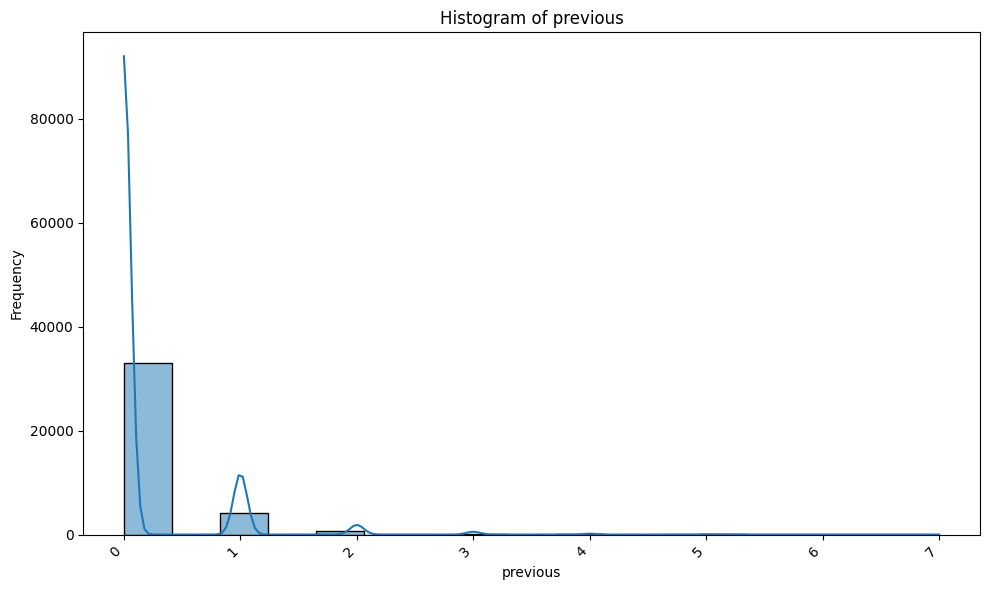

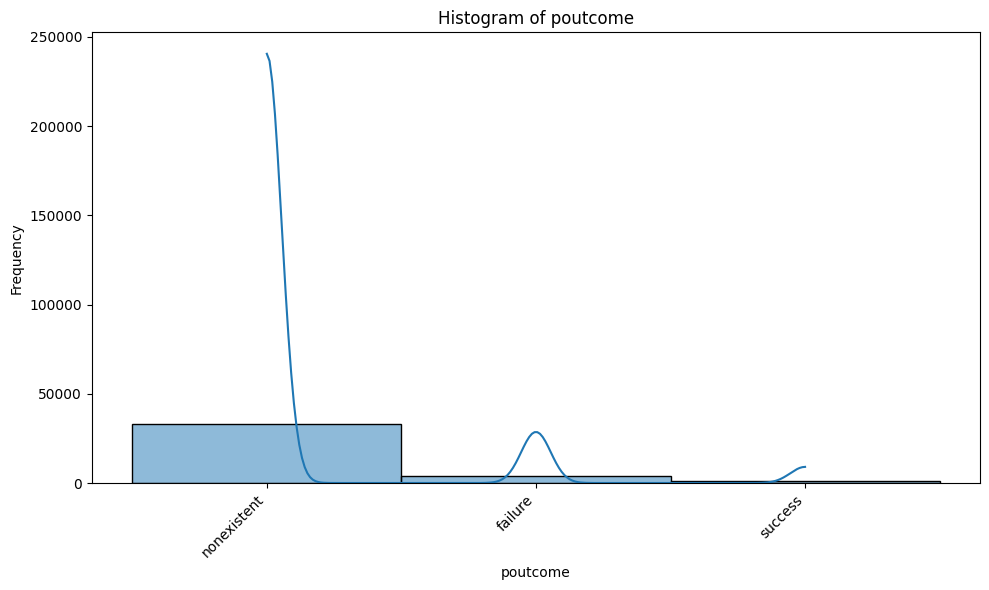

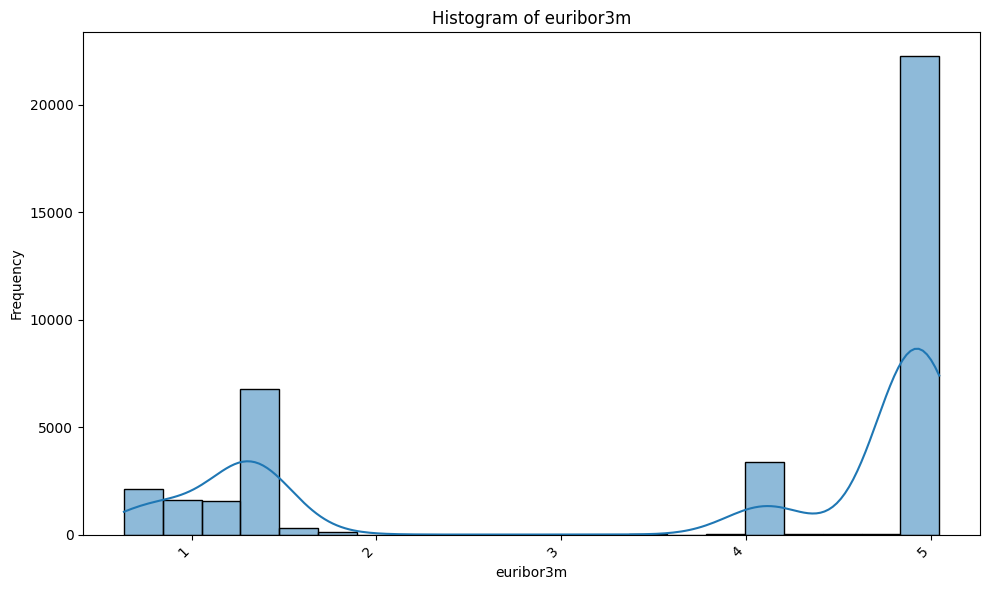

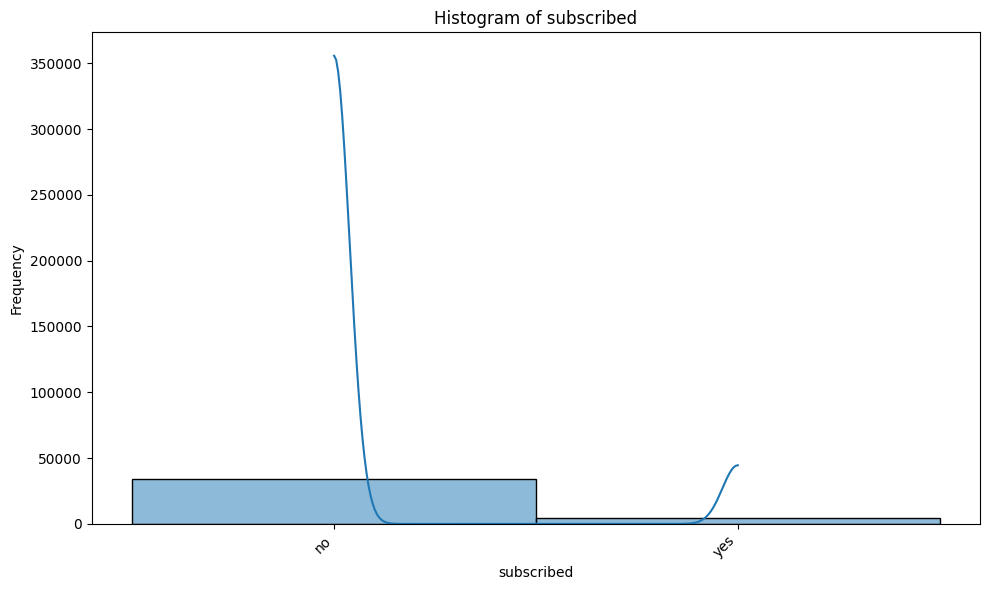

In [24]:


# Plot histograms for all columns
for col in clean_df_2.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=clean_df_2, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if they are categorical
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

ss - seeing histogram plots, dropping day of the week column - it is uniformly distributed. Also dropping pdays as it's majoritily driven by greater than 999 days. Also dropping month as there should be no relation to deposits with months.

In [25]:
clean_df_2 = clean_df_2.drop(columns=['day_of_week'])
clean_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         38245 non-null  int64  
 1   job         38245 non-null  object 
 2   marital     38245 non-null  object 
 3   education   38245 non-null  object 
 4   housing     38245 non-null  object 
 5   loan        38245 non-null  object 
 6   contact     38245 non-null  object 
 7   month       38245 non-null  object 
 8   campaign    38245 non-null  int64  
 9   pdays       38245 non-null  int64  
 10  previous    38245 non-null  int64  
 11  poutcome    38245 non-null  object 
 12  euribor3m   38245 non-null  float64
 13  subscribed  38245 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 4.4+ MB


In [26]:
clean_df_2 = clean_df_2.drop(columns=['pdays'])

In [35]:
clean_df_2 = clean_df_2.drop(columns=['month'])

ss - finding numberof unique values for all object columns

In [36]:


object_columns = clean_df_2.select_dtypes(include='object').columns

for col in object_columns:
    n_unique = clean_df_2[col].nunique()
    print(f"Column '{col}': {n_unique} unique values")

Column 'job': 11 unique values
Column 'marital': 3 unique values
Column 'education': 7 unique values
Column 'housing': 2 unique values
Column 'loan': 2 unique values
Column 'contact': 2 unique values
Column 'poutcome': 3 unique values
Column 'subscribed': 2 unique values


ss - split clean_df_2 in to target y = "subscribed" and features X = all columns other than "subscribed".

In [37]:

X = clean_df_2.drop(columns=['subscribed'])
y = clean_df_2['subscribed']

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

ss - use Labelencoder in y and hotencoder in object columns of X

In [38]:
# prompt: use Labelencoder in y

le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded[:5])
le.classes_

[0 0 0 0 0]


array(['no', 'yes'], dtype=object)

convert y_encoded into dataframe


In [40]:
# prompt: convert y_encoded into dataframe

y_df = pd.DataFrame(y_encoded, columns=['subscribed_encoded'])
y_df.head()

,subscribed_encoded
0,0
1,0
2,0
3,0
4,0


In [39]:

categorical_cols = X.select_dtypes(include='object').columns

# Create dummy variables for categorical columns in X
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(X_encoded.head())

   age  campaign  previous  euribor3m  job_blue-collar  job_entrepreneur  \
0   56         1         0      4.857            False             False   
1   57         1         0      4.857            False             False   
2   37         1         0      4.857            False             False   
3   40         1         0      4.857            False             False   
4   56         1         0      4.857            False             False   

   job_housemaid  job_management  job_retired  job_self-employed  ...  \
0           True           False        False              False  ...   
1          False           False        False              False  ...   
2          False           False        False              False  ...   
3          False           False        False              False  ...   
4          False           False        False              False  ...   

   education_basic.9y  education_high.school  education_illiterate  \
0               False             

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

ss - split y_df and X_encoded into X_train, y_train, X_test, y_test

In [41]:


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_df, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (30596, 27)
X_test shape: (7649, 27)
y_train shape: (30596, 1)
y_test shape: (7649, 1)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

ss - create a basline classifer model

In [43]:


# Create a DummyClassifier with strategy='most_frequent'
# This classifier always predicts the most frequent class in the training data.
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train the dummy classifier
dummy_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = dummy_clf.predict(X_test)

# Evaluate the accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline accuracy (most frequent class): {baseline_accuracy}")

# We can also check the distribution of the target variable in the training set
print("\nValue counts of the target in the training set:")
print(y_train['subscribed_encoded'].value_counts(normalize=True))

Baseline accuracy (most frequent class): 0.8879592103542947

Value counts of the target in the training set:
subscribed_encoded
0    0.888842
1    0.111158
Name: proportion, dtype: float64


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

ss - create a logistic regression classifer model

In [45]:

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear solver for simplicity with smaller datasets and binary classification

# Train the model on the training data
logreg.fit(X_train, y_train.values.ravel()) # .values.ravel() converts y_train to a 1D array as required by fit

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the accuracy of the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

print(f"Logistic Regression accuracy: {logreg_accuracy}")

Logistic Regression accuracy: 0.8980258857366976


### Problem 9: Score the Model

What is the accuracy of your model?

In [47]:
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression accuracy: {logreg_accuracy}")

Logistic Regression accuracy: 0.8980258857366976


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [49]:
# prompt: compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models. Using the default settings for each of the models, fit and score each. Also, be sure to compare the fit time of each of the models. Present your findings in a DataFrame similar to that below:
# Model	Train Time	Train Accuracy	Test Accuracy

# Initialize models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

# Create a list of models
models = [
    ('Logistic Regression', logreg),
    ('KNN', knn),
    ('Decision Tree', dt),
    ('SVM', svm)
]

results = []

for name, model in models:
    start_time = time.time()
    # Fit the model
    model.fit(X_train, y_train.values.ravel())
    fit_time = time.time() - start_time

    # Evaluate on training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Evaluate on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results.append({'Model': name, 'Train Time': fit_time, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.095013,0.899627,0.898026
1,KNN,0.010193,0.910282,0.884822
2,Decision Tree,0.145112,0.993234,0.836841
3,SVM,10.235610,0.888842,0.887959


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions